# CE 778

#Tutorial Exercise Number : 4

# Name : Sahil Barbade, Gunwanth Rayulu   
#Roll number : 210040131, 210040031
#Department : Civil
#Program : B.Tech
#Data Source : ASF ALOS PALSAR
#Data of Accquisition : 10-02-2025





In [40]:
!apt-get install -y gdal-bin python3-gdal
!pip install gdal

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
gdal-bin is already the newest version (3.6.4+dfsg-1~jammy0).
python3-gdal is already the newest version (3.6.4+dfsg-1~jammy0).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.


In [2]:
!pip install matplotlib numpy Pillow

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import math

# Open the PALSAR file
palsar = gdal.Open('/content/drive/MyDrive/ALPSRP242970370-H1.1__A/VOL-ALPSRP242970370-H1.1__A')

# Dimensions of the ALOS PALSAR data (x, y, bands)
cols = palsar.RasterXSize
rows = palsar.RasterYSize
bands = palsar.RasterCount

print("Rows, Columns = ", rows, ",", cols)
print("bands =", bands)

# Read different bands
HH_data = palsar.GetRasterBand(1)
HV_data = palsar.GetRasterBand(2)

# Read bands as arrays
HH_arr = HH_data.ReadAsArray()
HV_arr = HV_data.ReadAsArray()

Rows, Columns =  18432 , 4640
bands = 2


# Question 1


HH Polariation Intensity plot

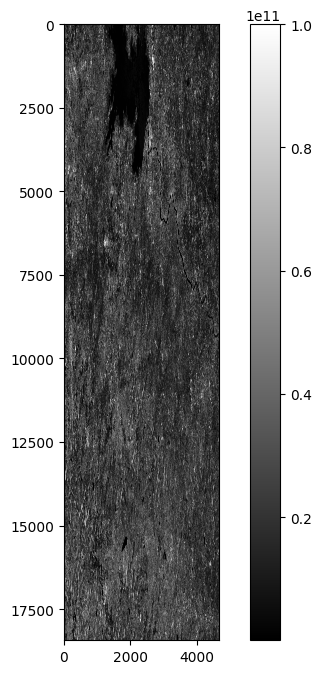

In [5]:
HH_intensity = np.absolute(HH_arr)**2
HV_intensity = np.absolute(HV_arr)**2

#plotting of HH_Intensity
fig, ax = plt.subplots(1,1,figsize = (8,8))
plt.imshow((np.flipud(HH_intensity)), cmap = 'gray',vmax=10**11,vmin=10**7)
plt.colorbar()

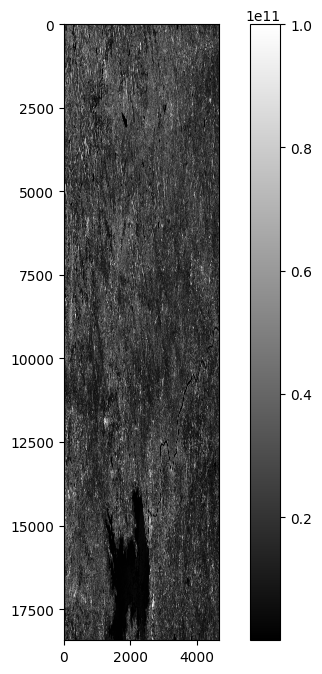

In [6]:

#plotting of HH_Intensity
fig, ax = plt.subplots(1,1,figsize = (8,8))
plt.imshow((HH_intensity), cmap = 'gray',vmax=10**11,vmin=10**7)
plt.colorbar()

In [7]:
HH_intensity = np.where(HH_intensity == 0.,0.01, HH_intensity)
HV_intensity = np.where(HV_intensity == 0., 0.01, HV_intensity)

HH Polariation log Intensity plot

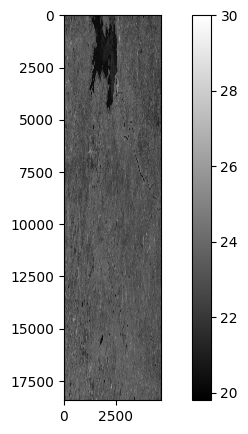

In [8]:
#plotting of log intensity of HH
fig, ax = plt.subplots(1,1,figsize = (8,5))
plt.imshow(np.log(np.flipud(HH_intensity)), cmap = 'gray',vmax=22,vmin=30)
plt.colorbar()

HV Polariation Intensity plot

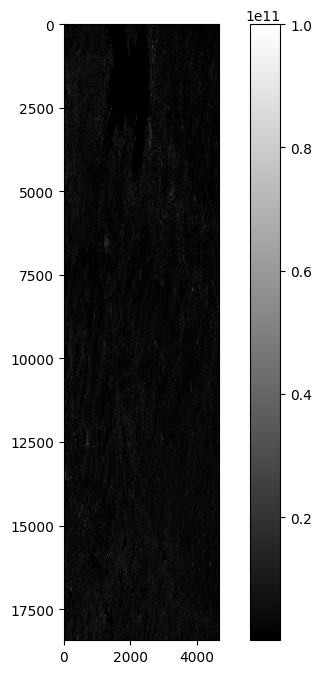

In [9]:
#plotting of HV_Intensity
fig, ax = plt.subplots(1,1,figsize = (8,8))
plt.imshow((np.flipud(HV_intensity)), cmap = 'gray',vmax=10**11,vmin=10**7)
plt.colorbar()

HV Polariation log Intensity plot

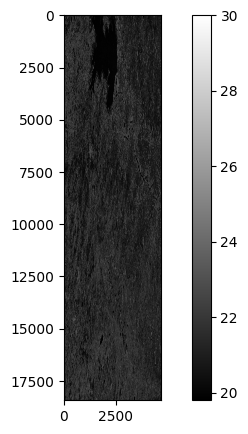

In [10]:
#plotting of log intensity of HV
fig, ax = plt.subplots(1,1,figsize = (8,5))
plt.imshow(np.log(np.flipud(HV_intensity)), cmap = 'gray',vmax=22,vmin=30)
plt.colorbar()

Stacked RGB Image

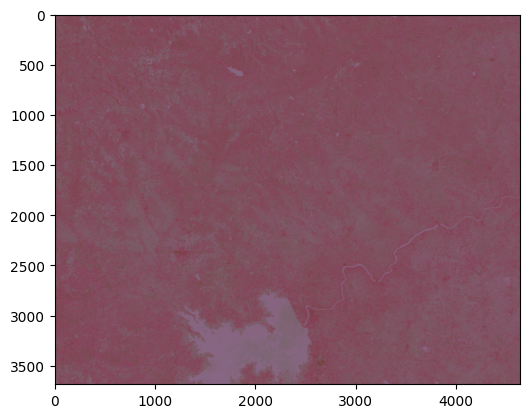

In [11]:
#multilooking of image

numlooks = 5
ind = np.array(range(0,numlooks * math.floor((HH_arr.shape[0])/numlooks),numlooks))

lookedHH = HH_arr[ind,:]
lookedHV = HV_arr[ind,:]

for i in range(numlooks+1):
  for look in range(numlooks-1):
    lookedHH = lookedHH + HH_arr[ind+look,:]
    lookedHV = lookedHV + HV_arr[ind+look,:]

# converting from DN to sigma_naught
sigmaHH = 10*np.log10(np.absolute(lookedHH)**2) - 83 - 32
sigmaHV = 10*np.log10(np.absolute(lookedHV)**2) - 83 - 32
rat = sigmaHH - sigmaHV

#normalization
sigHH_norm = (np.max(sigmaHH)-sigmaHH)/(np.max(sigmaHH)-np.min(sigmaHH))
sigHV_norm = (np.max(sigmaHV)-sigmaHV)/(np.max(sigmaHV)-np.min(sigmaHV))
rat_norm = (np.max(rat)-rat)/(np.max(rat)-np.min(rat))

#stacked rgb image
rgb = np.dstack((rat_norm,sigHV_norm,sigHH_norm))
plt.imshow(rgb)

# Question 2


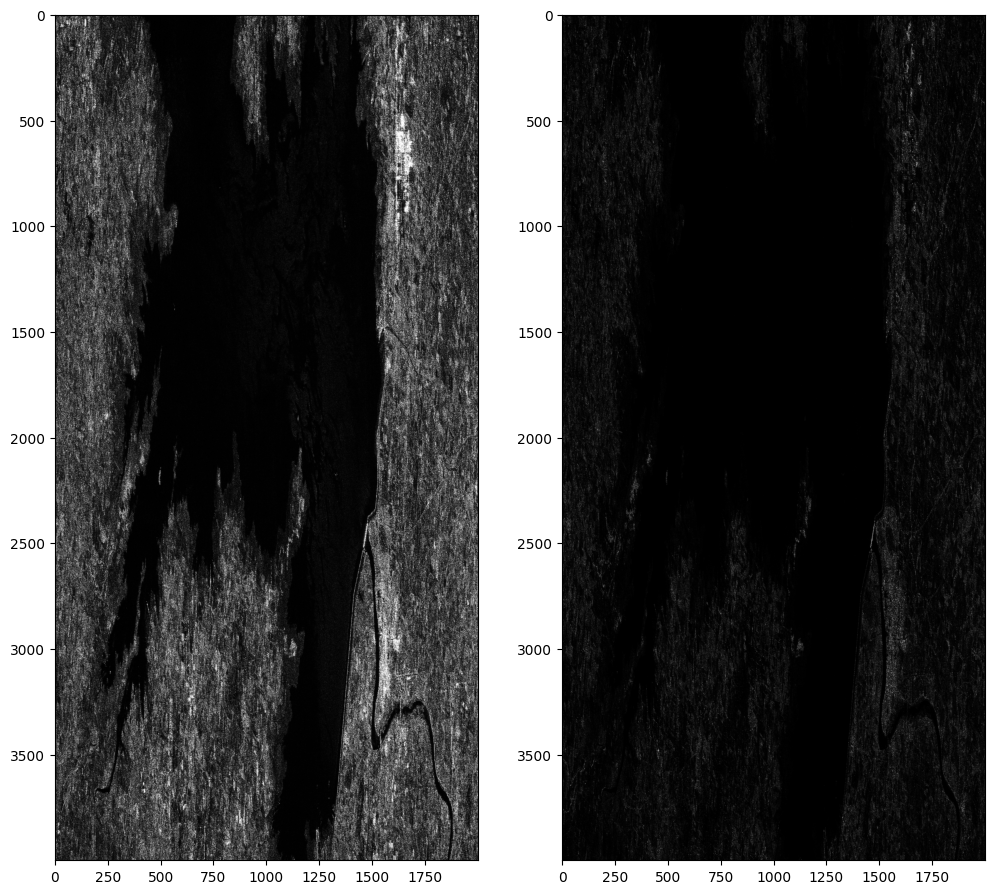

In [27]:
#to subset image having river feature
HH_water_body_intensity = HH_intensity[14000:18000, 1000:3000]
HV_water_body_intensity = HV_intensity[14000:18000, 1000:3000]
HH_water_body_arr = HH_arr[14000:18000, 1000:3000]
HV_water_body_arr = HV_arr[14000:18000, 1000:3000]

#plotting of HH_Intensity & HV_Intensity
fig, ax = plt.subplots(1,2,figsize = (12,12))
ax[0].imshow((np.flipud(HH_water_body_intensity)), cmap = 'gray',vmax=10**11,vmin=10**7)
ax[1].imshow((np.flipud(HV_water_body_intensity)), cmap = 'gray',vmax=10**11,vmin=10**7)

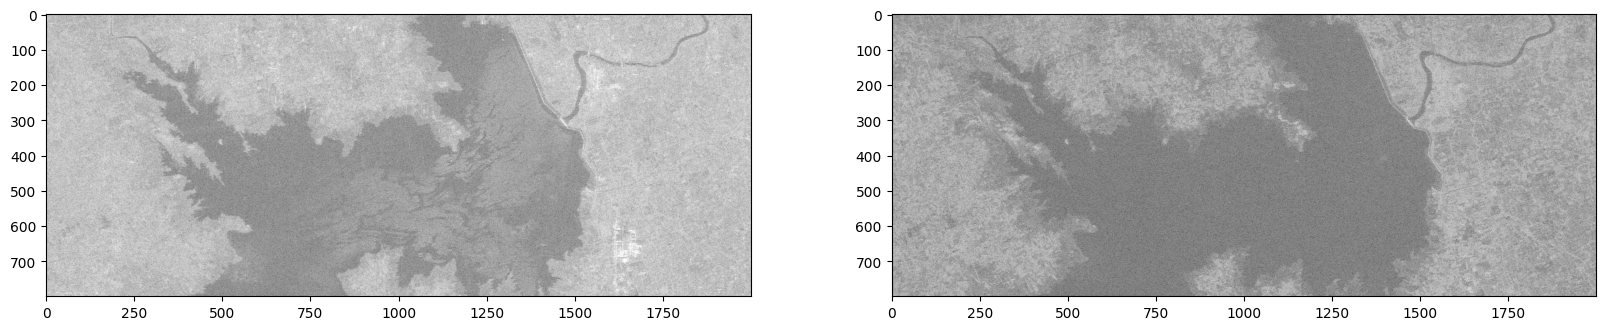

In [28]:
#multilooking of water body image

numlooks = 5
ind = np.array(range(0,numlooks * math.floor((HH_water_body_arr.shape[0])/numlooks),numlooks))

looked_water_body_HH = HH_water_body_arr[ind,:]
looked_water_body_HV = HV_water_body_arr[ind,:]

for i in range(numlooks+1):
  for look in range(numlooks-1):
    looked_water_body_HH = looked_water_body_HH + HH_water_body_arr[ind+look,:]
    looked_water_body_HV = looked_water_body_HV + HV_water_body_arr[ind+look,:]

# converting from DN to sigma_naught
sigma_water_body_HH = 10*np.log10(np.absolute(looked_water_body_HH)**2) - 83 - 32
sigma_water_body_HV = 10*np.log10(np.absolute(looked_water_body_HV)**2) - 83 - 32

figure, ax = plt.subplots(1,2, figsize=(20,12))
a=ax[0].imshow(sigma_water_body_HH,cmap = 'gray',vmin=-50,vmax=30)
ax[1].imshow(sigma_water_body_HV,cmap = 'gray',vmin=-50,vmax=30)

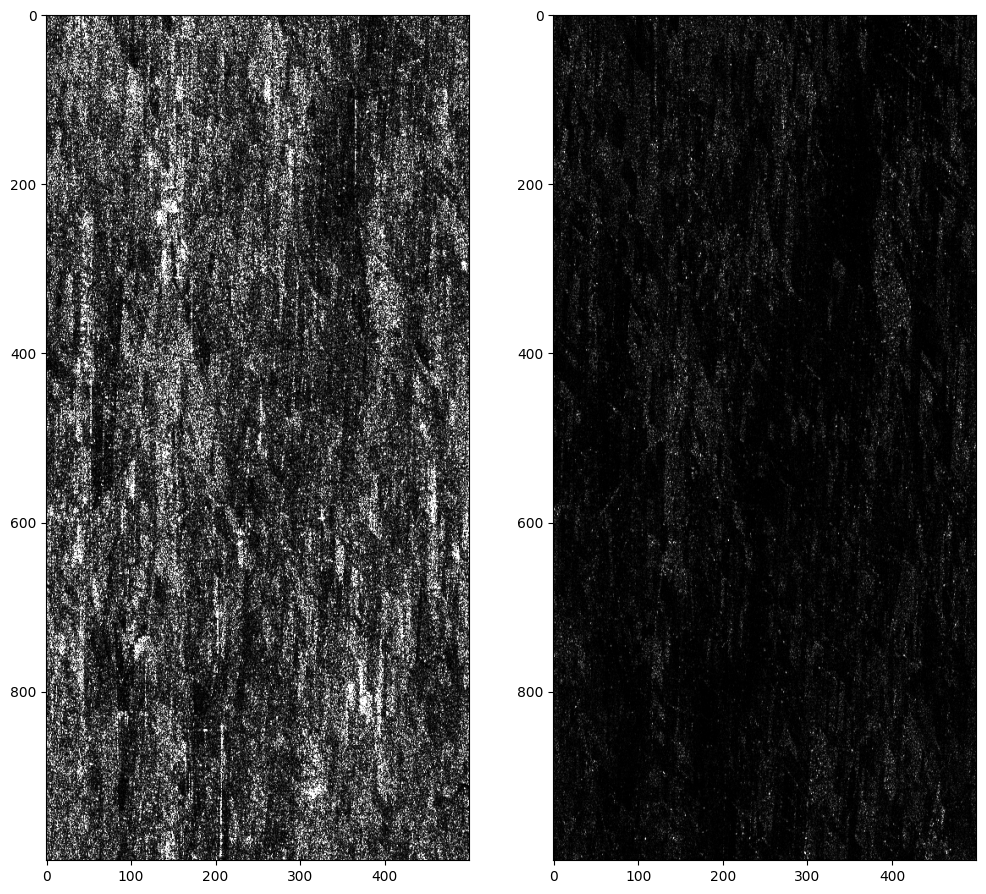

In [29]:
#to subset image having agricultural land feature

HH_agiculture_land_intensity = HH_intensity[14000:15000, 1500:2000]
HV_agiculture_land_intensity = HV_intensity[14000:15000, 1500:2000]
HH_agiculture_land_arr = HH_arr[14000:15000, 1500:2000]
HV_agiculture_land_arr = HV_arr[14000:15000, 1500:2000]

#plotting of HH_Intensity & HV_Intensity
fig, ax = plt.subplots(1,2,figsize = (12,12))
ax[0].imshow((np.flipud(HH_agiculture_land_intensity)), cmap = 'gray',vmax=10**11,vmin=10**7)
ax[1].imshow((np.flipud(HV_agiculture_land_intensity)), cmap = 'gray',vmax=10**11,vmin=10**7)

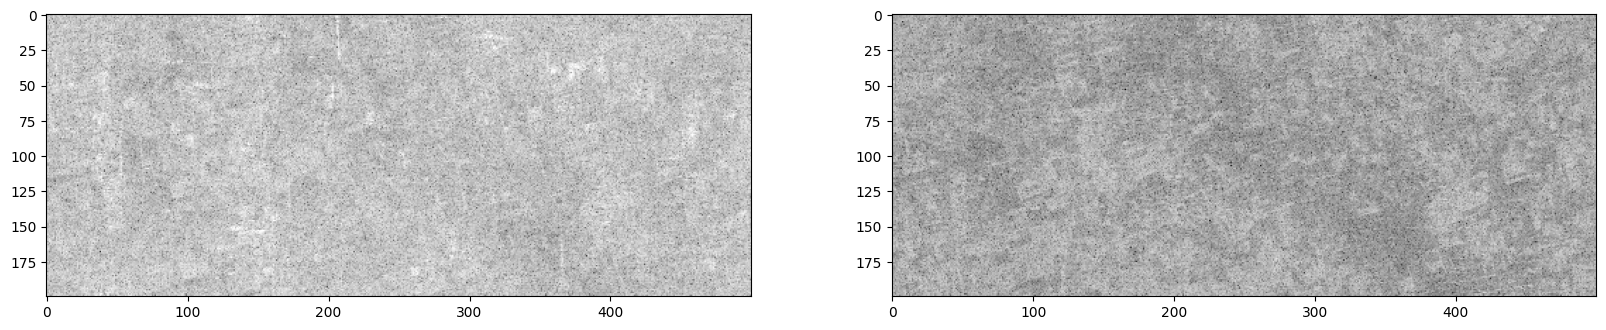

In [30]:
#multilooking of agricultural land image

numlooks = 5
ind = np.array(range(0,numlooks * math.floor((HH_agiculture_land_arr.shape[0])/numlooks),numlooks))

looked_agiculture_land_HH = HH_agiculture_land_arr[ind,:]
looked_agiculture_land_HV = HV_agiculture_land_arr[ind,:]

for i in range(numlooks+1):
  for look in range(numlooks-1):
    looked_agiculture_land_HH = looked_agiculture_land_HH + HH_agiculture_land_arr[ind+look,:]
    looked_agiculture_land_HV = looked_agiculture_land_HV + HV_agiculture_land_arr[ind+look,:]

sigma_agiculture_land_HH = 10*np.log10(np.absolute(looked_agiculture_land_HH)**2) - 83 - 32
sigma_agiculture_land_HV = 10*np.log10(np.absolute(looked_agiculture_land_HV)**2) - 83 - 32

figure, ax = plt.subplots(1,2, figsize=(20,12))
a=ax[0].imshow(sigma_agiculture_land_HH,cmap = 'gray',vmin=-50,vmax=30)
ax[1].imshow(sigma_agiculture_land_HV,cmap = 'gray',vmin=-50,vmax=30)

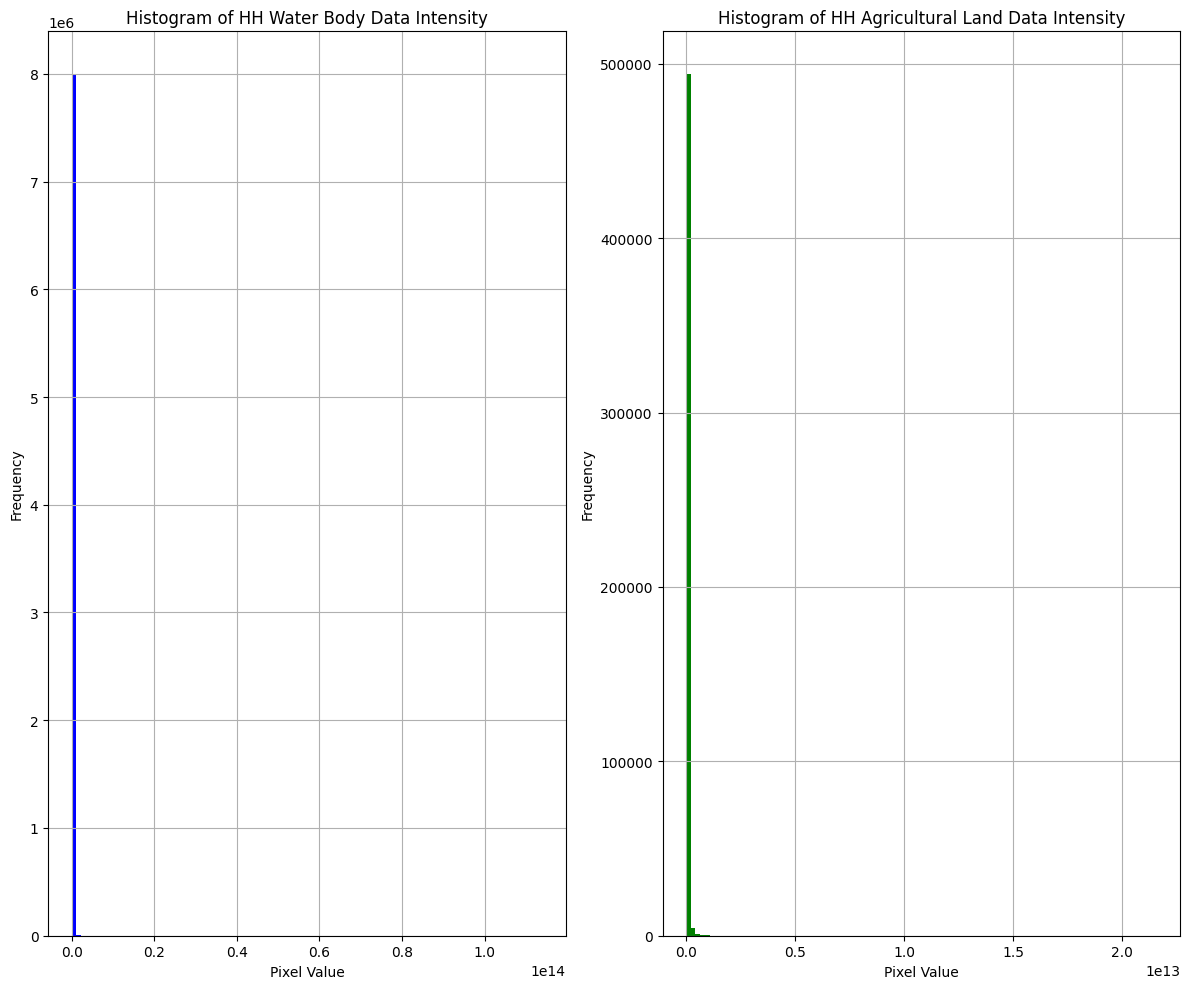

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(12, 10))

# Histogram for water body
ax[0].hist(HH_water_body_intensity.ravel(), bins=100, color='blue', alpha=1)
ax[0].set_xlabel('Pixel Value')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Histogram of HH Water Body Data Intensity')
ax[0].grid(True)

# Histogram for agricultural land
ax[1].hist(HH_agiculture_land_intensity.ravel(), bins=100, color='green', alpha=1)
ax[1].set_xlabel('Pixel Value')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Histogram of HH Agricultural Land Data Intensity')
ax[1].grid(True)

plt.tight_layout()
plt.show()


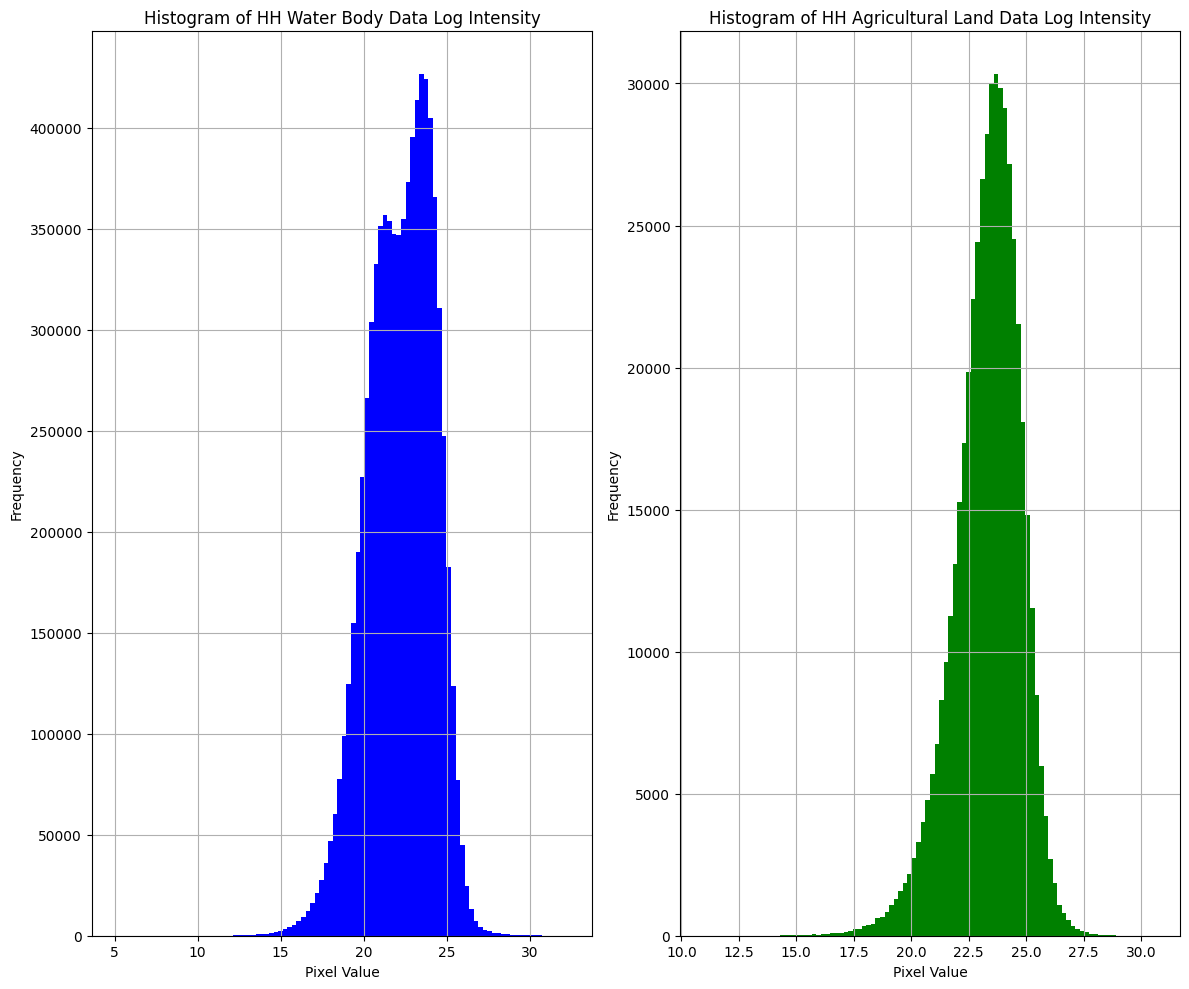

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(12, 10))

# Histogram for water body
ax[0].hist(np.log(HH_water_body_intensity+1e-10).ravel(), bins=100, color='blue', alpha=1)
ax[0].set_xlabel('Pixel Value')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Histogram of HH Water Body Data Log Intensity')
ax[0].grid(True)

# Histogram for agricultural land
ax[1].hist(np.log(HH_agiculture_land_intensity.ravel() + 1e-10), bins=100, color='green', alpha=1)
ax[1].set_xlabel('Pixel Value')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Histogram of HH Agricultural Land Data Log Intensity')
ax[1].grid(True)

plt.tight_layout()
plt.show()

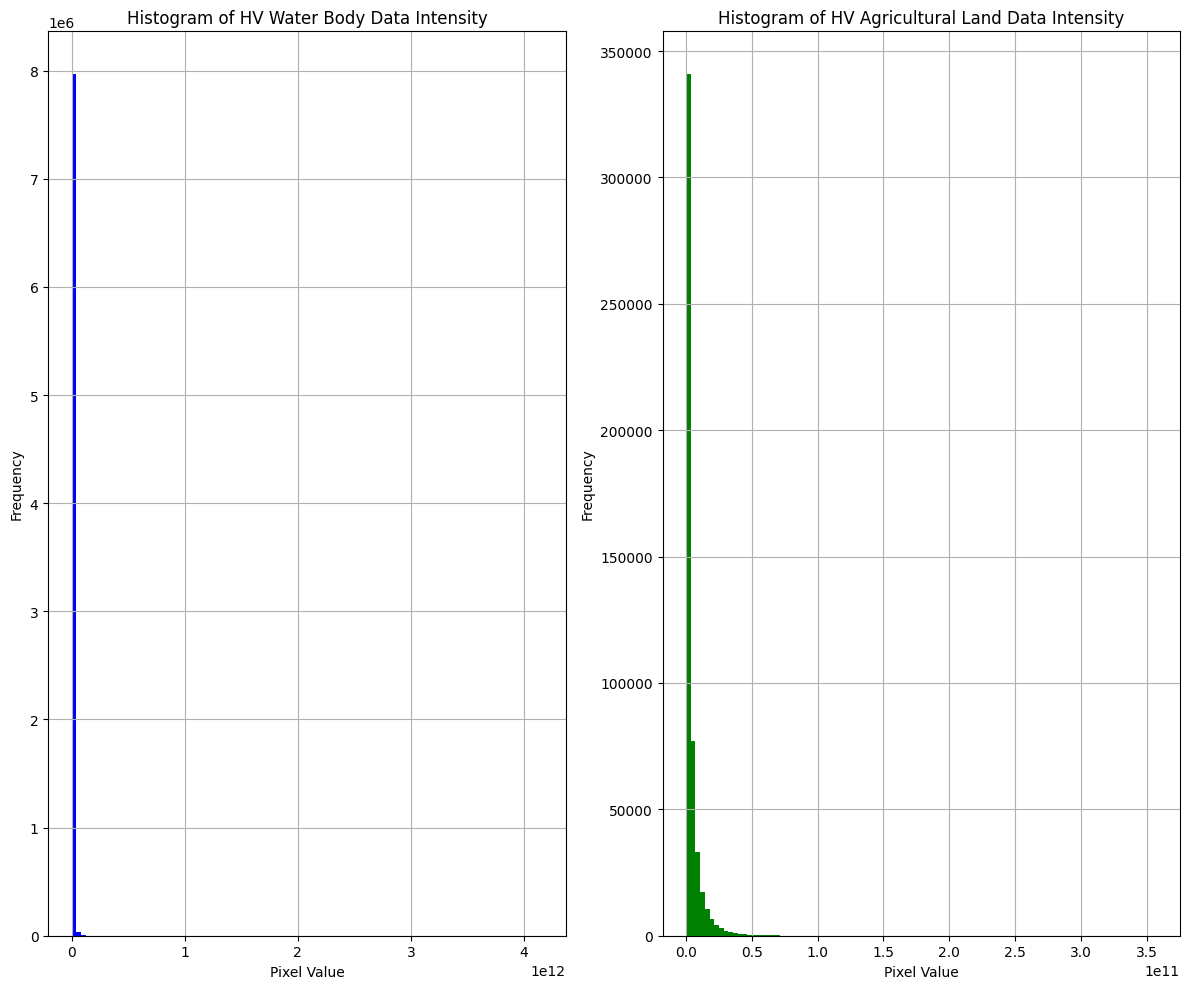

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(12, 10))

# Histogram for water body
ax[0].hist(HV_water_body_intensity.ravel(), bins=100, color='blue', alpha=1)
ax[0].set_xlabel('Pixel Value')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Histogram of HV Water Body Data Intensity')
ax[0].grid(True)

# Histogram for agricultural land
ax[1].hist(HV_agiculture_land_intensity.ravel(), bins=100, color='green', alpha=1)
ax[1].set_xlabel('Pixel Value')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Histogram of HV Agricultural Land Data Intensity')
ax[1].grid(True)

plt.tight_layout()
plt.show()

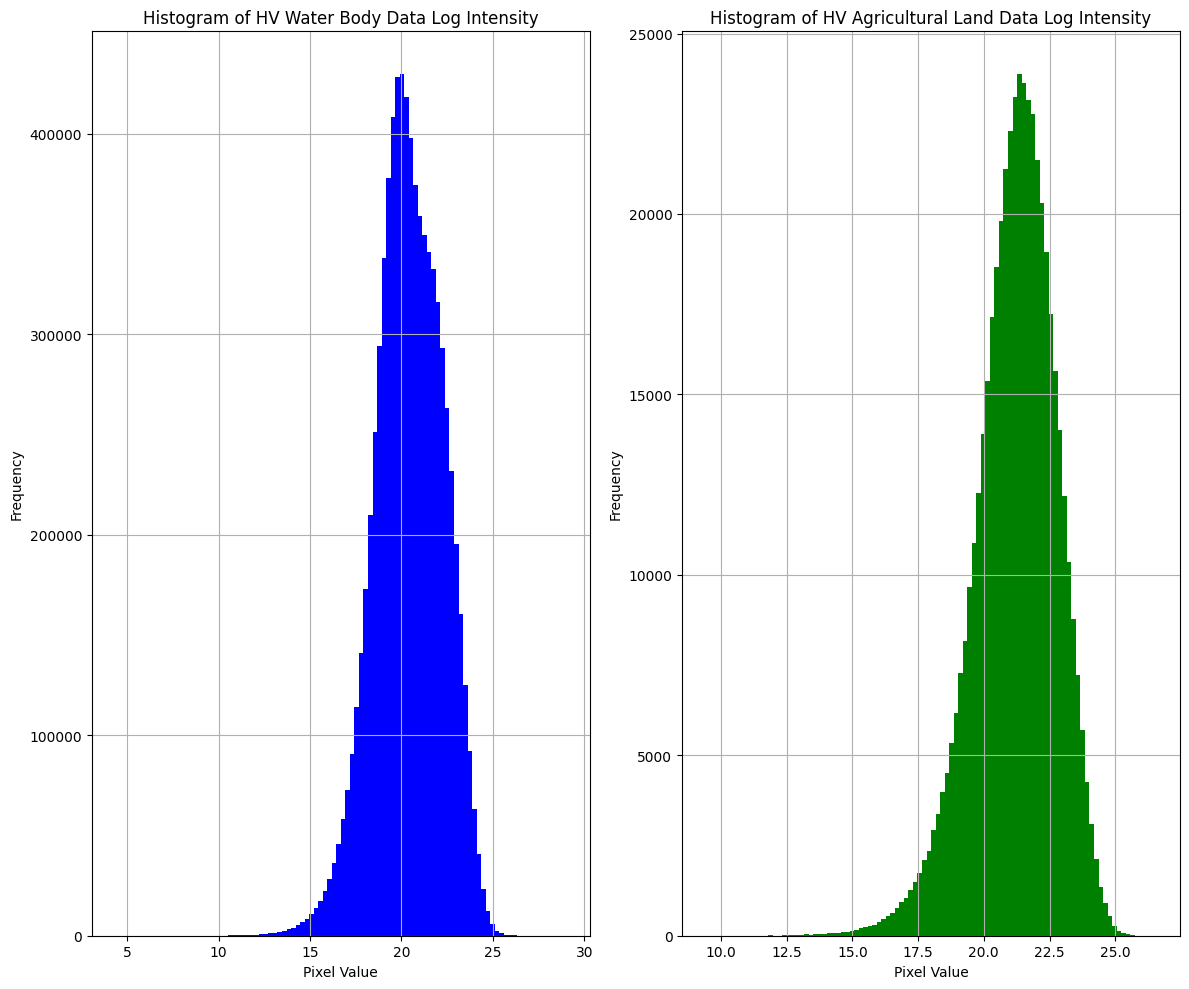

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(12, 10))

# Histogram for water body
ax[0].hist(np.log(HV_water_body_intensity+1e-10).ravel(), bins=100, color='blue', alpha=1)
ax[0].set_xlabel('Pixel Value')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Histogram of HV Water Body Data Log Intensity')
ax[0].grid(True)

# Histogram for agricultural land
ax[1].hist(np.log(HV_agiculture_land_intensity.ravel() + 1e-10), bins=100, color='green', alpha=1)
ax[1].set_xlabel('Pixel Value')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Histogram of HV Agricultural Land Data Log Intensity')
ax[1].grid(True)

plt.tight_layout()
plt.show()

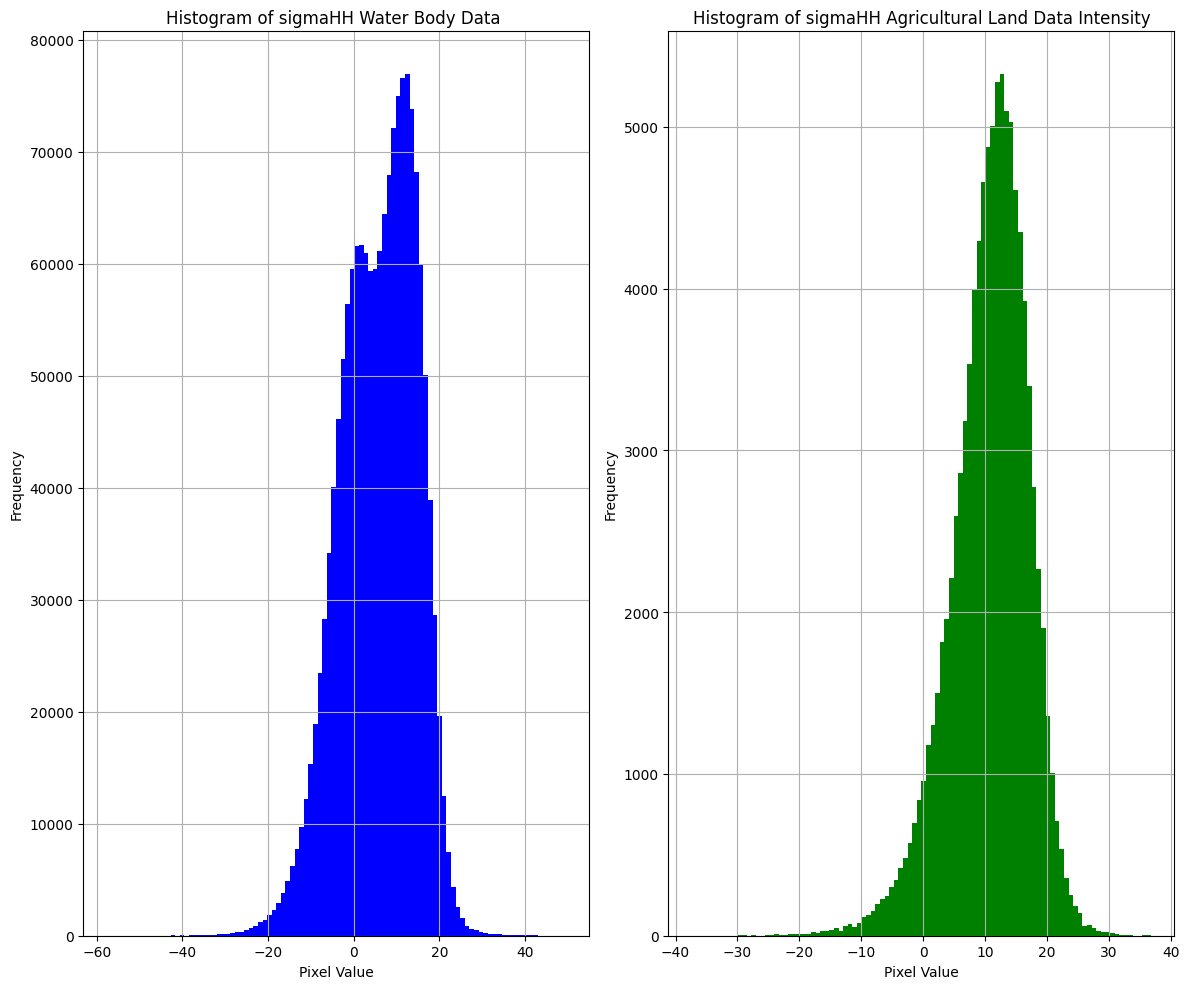

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(12, 10))

# Histogram for water body
ax[0].hist(sigma_water_body_HH.ravel(), bins=100, color='blue', alpha=1)
ax[0].set_xlabel('Pixel Value')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Histogram of sigmaHH Water Body Data ')
ax[0].grid(True)

# Histogram for agricultural land
ax[1].hist(sigma_agiculture_land_HH.ravel(), bins=100, color='green', alpha=1)
ax[1].set_xlabel('Pixel Value')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Histogram of sigmaHH Agricultural Land Data Intensity')
ax[1].grid(True)

plt.tight_layout()
plt.show()

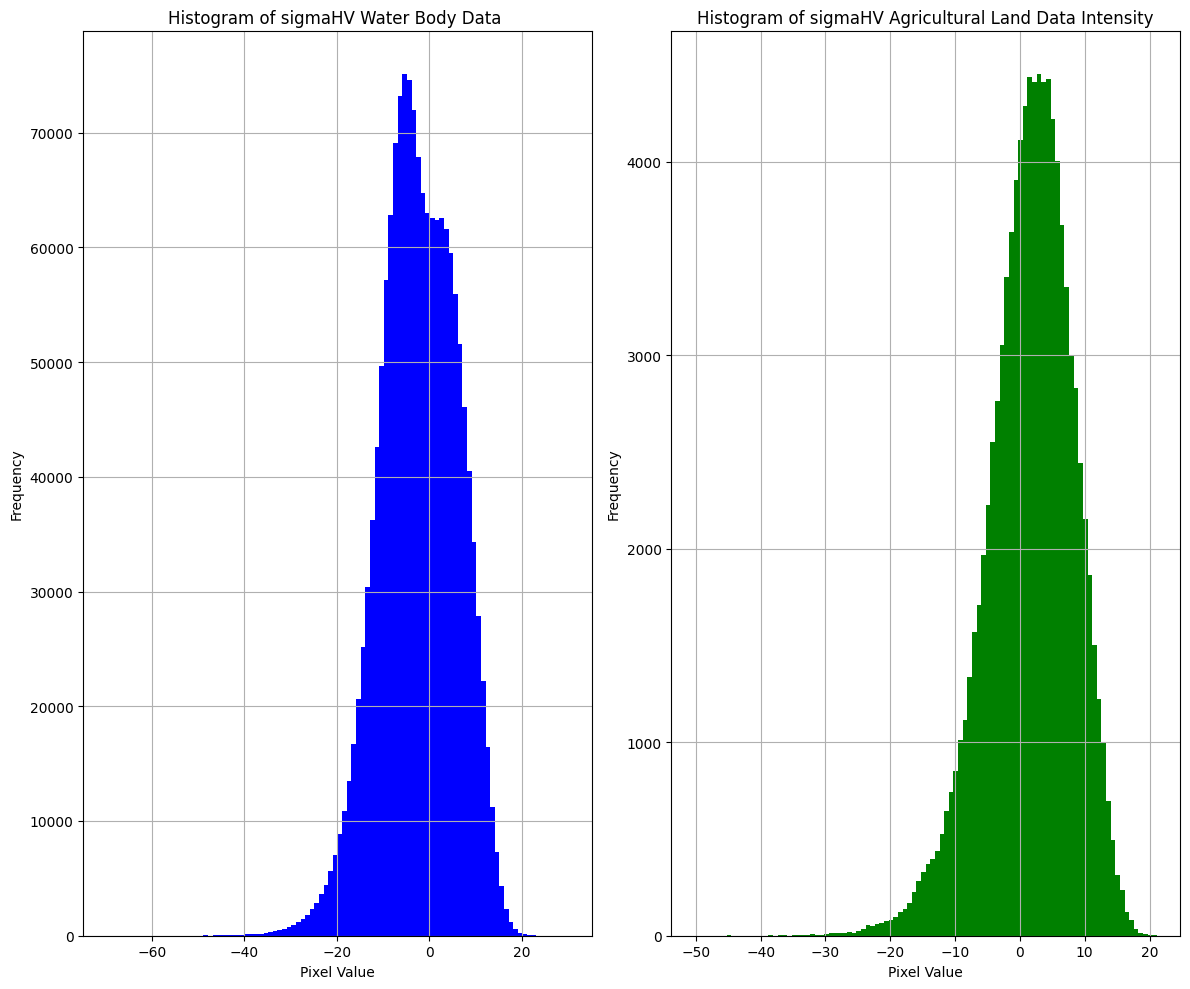

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(12, 10))

# Histogram for water body
ax[0].hist(sigma_water_body_HV.ravel(), bins=100, color='blue', alpha=1)
ax[0].set_xlabel('Pixel Value')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Histogram of sigmaHV Water Body Data ')
ax[0].grid(True)

# Histogram for agricultural land
ax[1].hist(sigma_agiculture_land_HV.ravel(), bins=100, color='green', alpha=1)
ax[1].set_xlabel('Pixel Value')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Histogram of sigmaHV Agricultural Land Data Intensity')
ax[1].grid(True)

plt.tight_layout()
plt.show()

# Conclusion

In essence, the distinct differences in backscatter between water and agricultural land are due to the fundamentally different ways in which microwaves interact with these surfaces. The smooth, dielectric nature of water leads to specular reflection and low backscatter, while the rough, complex, and vegetated nature of agricultural land results in significant volume and surface scattering, leading to higher and more variable backscatter.